 Projeto Alura One - Data science
---
  Como projeto sujerido pela Alura iremos analisar os data sets das quatro lojas do seu joão para mostrar qual loja deve ser vendida em vista de varios pontos a serem analisados a seguir.


## Importação dos dados

Aqui fazemos toda a parte de importação dos dados csv direto do link do github e das bibliotecas e funções usadas durante todo a execução do codigo :) como também definimos as lojas como um unico dicionario

```
lojas = {
    "Loja 1": loja1,
    "Loja 2": loja2,
    "Loja 3": loja3,
    "Loja 4": loja4,
}
```


## Principais bibliotecas utilizadas

[![NumPy](https://img.shields.io/badge/NumPy-013243?style=for-the-badge&logo=numpy&logoColor=white)](https://numpy.org/) – Biblioteca para cálculos numéricos com arrays e vetores.

[![Pandas](https://img.shields.io/badge/Pandas-150458?style=for-the-badge&logo=pandas&logoColor=white)](https://pandas.pydata.org/) – Manipulação e análise de dados estruturados (tabelas).

[![Matplotlib](https://img.shields.io/badge/Matplotlib-11557C?style=for-the-badge&logo=matplotlib&logoColor=white)](https://matplotlib.org/) – Visualização de dados com gráficos personalizáveis.

[![Seaborn](https://img.shields.io/badge/Seaborn-2D4F6B?style=for-the-badge&logo=seaborn&logoColor=white)](https://seaborn.pydata.org/) – Gráficos estatísticos mais elegantes e informativos.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import folium
from folium.plugins import HeatMap



url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

lojas = {
    "Loja 1": loja1,
    "Loja 2": loja2,
    "Loja 3": loja3,
    "Loja 4": loja4,
}
loja1.head(5)



,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


# 1. Faturamento por loja.

    Aqui iremos analisar e somar a venda de todas as lojas do seu João individualmente, usando dicionario por compreensão para somar a coluna "Preço" de cada loja e retonar o faturamento total de cada uma.
    

In [3]:
faturamento_lojas = {nome: df["Preço"].sum() for nome, df in lojas.items()}
print(faturamento_lojas)

{'Loja 1': np.float64(1534509.12), 'Loja 2': np.float64(1488459.06), 'Loja 3': np.float64(1464025.03), 'Loja 4': np.float64(1384497.58)}


    Após isso iremos formatar os dados em um "Data Frame" do pandas para melhor conseguirmos plotar o garfico, gerando assim um indicie de qual loja mais vende e menos vende.
    

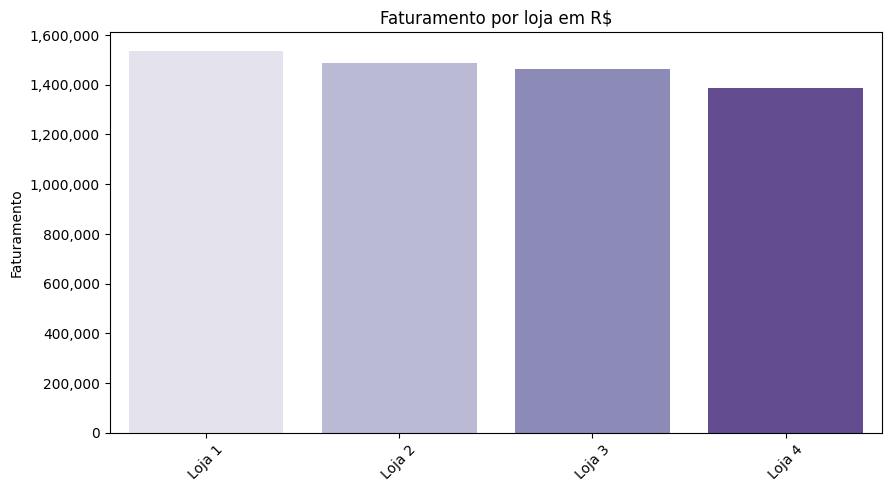

In [4]:
df_faturamento = pd.DataFrame.from_dict(faturamento_lojas, orient='index', columns=["Faturamento"])
df_faturamento.index.name = "Loja"
df_faturamento.reset_index(inplace=True)
plt.figure(figsize=(9, 5))
sns.set_style = ('Whitegrid')
ax = sns.barplot(y='Faturamento',x='Loja',hue='Loja', data=df_faturamento, palette='Purples',errorbar=('ci', 95))
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.title('Faturamento por loja em R$')
plt.xlabel('')
plt.ylabel('Faturamento')
plt.xticks(rotation = 45)
plt.tight_layout(pad=1.0)


Com base nas informações do gráfico, conseguimos o primeiro insight para a análise: a Loja 1 apresenta o maior faturamento entre as lojas, enquanto a Loja 4 tem o menor faturamento. Essa diferença de desempenho financeiro já nos dá uma direção importante para nossa análise, permitindo que possamos investigar mais a fundo os motivos que podem explicar essas variações. Essa informação será guardada como um ponto de partida para aprofundarmos a análise e identificar possíveis ações a serem tomadas pelo seu joão.

# 2. Vendas por Categoria.

    Aqui iremos realizar a soma das vendas por categoria de produtos e analisar quais são as categorias que mais vendem por loja e as que menos vendem o que pode indicar, por exemplo que uma loja deve parar de vender categoria de produtos x ou y por falta e/ou baixo volume de vendas e focar em categorias que realmente tem rotatividade e lucro total, para isso faremos a mesma coisa que fizemos com o faturamento iremos iterar sobre cada loja somando o "Preço" de cada "Categoria de produto" }

In [5]:
venda_por_categoria = {
    nome_loja: df_loja.groupby('Categoria do Produto')['Preço'].sum().to_dict()
    for nome_loja, df_loja in lojas.items()
}

    Após isso iremos formatar os dados em um "Data Frame" do pandas para melhor conseguirmos plotar o garfico, gerando assim um grafico mostrando quais as categorias que mais tiveram vendas e as que menos tiveram vendas.
    

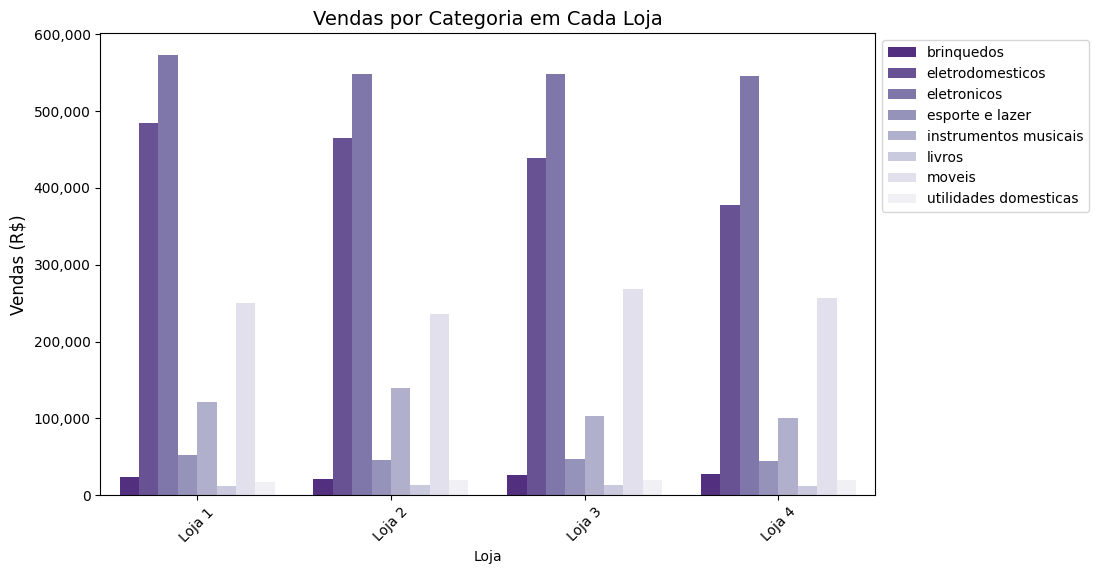

In [6]:
df_vendas = pd.DataFrame.from_dict(venda_por_categoria, orient='index')
df_vendas = df_vendas.reset_index().melt(id_vars='index', var_name='Categoria', value_name='Vendas')
df_vendas = df_vendas.rename(columns={'index': 'Loja'})
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_vendas, x='Loja', y='Vendas',hue = 'Categoria', palette='Purples_r')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.title('Vendas por Categoria em Cada Loja', fontsize=14)
plt.ylabel('Vendas (R$)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper left', frameon=True,bbox_to_anchor=(1, 1))
plt.show()

    Com isso já conseguimos identificar que as 4 lojas do seu João tem as mesmas categorias de vendas como maiores vendedoras

    1. Brinquedos
    2. eletrodomesticos
    3. moveis

# 3. Média de Avaliação das Lojas

    Nesse ponto iremos avaliar como cada loja do seu João é avaliada pelos seus clientes, fazendo a media de avaliação de todas as filais do seu joão para conseguirmos ter uma noção de como os clientes dele avaliam cada loja, esse é um ponto de suma importancia em vista de que uma loja mal avaliada pode entrar em declinio no faturamento etc. 

In [7]:
media_avaliacoes = {nome_loja: df_loja["Avaliação da compra"].mean().round(2)
 for nome_loja, df_loja in lojas.items()}

    Após isso iremos formatar os dados em um "Data Frame" do pandas para melhor conseguirmos plotar o garfico, gerando assim um grafico mostrando a avaliação media de cada filial e conseguirmos vizualizar cada avaliação.
    

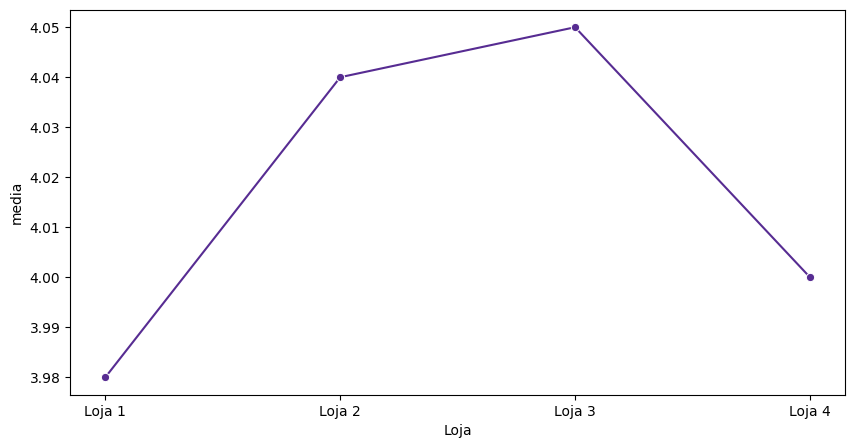

In [8]:
df_media = pd.DataFrame.from_dict(media_avaliacoes, orient='index', columns=['media'])
df_media = df_media.reset_index().rename(columns={'index': 'Loja'})

plt.figure(figsize=(10, 5))
sns.set_style = 'whitegrid'

sns.lineplot(x='Loja', y='media', data=df_media, color=sns.color_palette("Purples")[5], marker='o',)

plt.show()

    A aqui conseguimos vizualizar mais um bom insight, a loja 1 embora tenha o maior volume de vendas também possui a menor avaliação das 4 lojas(3.98) isso pode ser por conta do volume de vendas ser maior como pode apontar também como baixa qualidade no atendimento etc são situações a se analisar por inteiro. 

# 4. Produtos Mais e Menos Vendidos

    Para os produtos mais vendidos e menos vendidos de cada loja iremos fazer algo bem simples também, iremos contar quais são os produtos vendidos de cada loja e quantas vezes eles aparecem utilizando o ".value_counts" para gerar um dicionario com as chaves {'loja1': [{'brinquedo': 40}]} por exemplo e após isso iremos procurar nessa lista o primeiro item que será o item com mais quantidades usando o index[0] e iloc[0] e o ultimo usando o index[-1] e iloc[-1] para o ultimo item que terá menos vendas.

In [9]:
produtos_vendidos = {nome_loja: df['Produto'].value_counts() for nome_loja, df in lojas.items()}
item_mais_vendido = {
    nome_loja: (contagem_produto.index[0], contagem_produto.iloc[0])
    for nome_loja, contagem_produto in produtos_vendidos.items()
}
item_menos_vendido = {
    nome_loja: (contagem_produto.index[-1], contagem_produto.iloc[-1])
    for nome_loja, contagem_produto in produtos_vendidos.items()
}


    Seguindo o mesmo padrão anterior iremos transformar os dicionarios em data frames para melhor utilizalos junto ao matplotlib, criando dois data frames, para o produto mais e menos vendidos, para a plotagem vamos utilizar os subplots do Matplotlib, que cria uma matriz onde cada item da matriz pode ser um grafico, no nosso caso criaremos uma matriz (1, 2) e para acessar cada grafico utilizaremos o indice de cada item, no caso [0] e [1] 

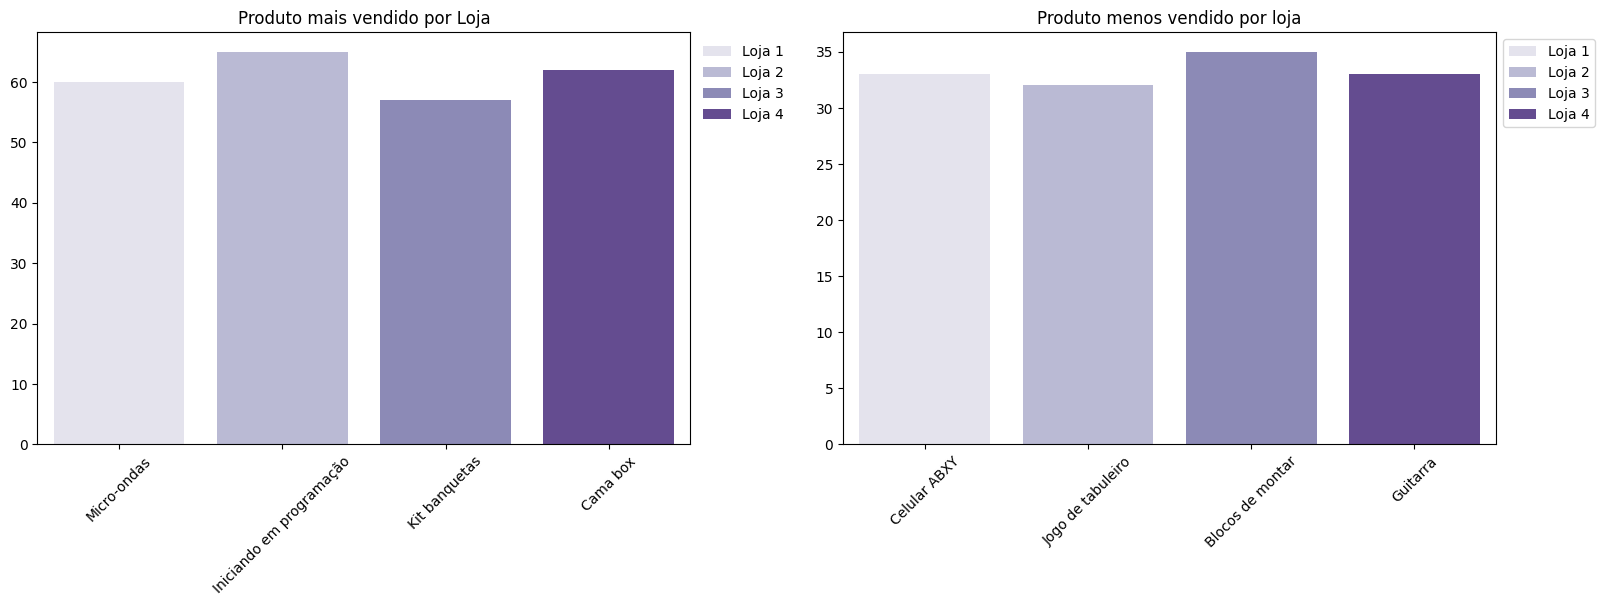

In [10]:
df_mais_vendidos = pd.DataFrame.from_dict(item_mais_vendido, orient='index', columns=['Produto', 'Quantidade'])
df_mais_vendidos = df_mais_vendidos.reset_index().rename(columns={'index': 'Loja'})

df_menos_vendidos = pd.DataFrame.from_dict(item_menos_vendido, orient='index', columns=['Produto', 'Quantidade'])
df_menos_vendidos = df_menos_vendidos.reset_index().rename(columns={'index': 'Loja'})

fig , axs = plt.subplots(1, 2, figsize=(15,6))

sns.barplot(x='Produto', y='Quantidade', data=df_mais_vendidos, ax=axs[0], hue = 'Loja', palette='Purples')
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].set_title('Produto mais vendido por Loja')
axs[0].legend(loc='upper left', frameon=False,bbox_to_anchor=(1, 1))

plt.tight_layout(pad=0.5)

sns.barplot(x='Produto', y='Quantidade', data=df_menos_vendidos, ax=axs[1], hue = 'Loja', palette='Purples')
axs[1].tick_params(axis='x', rotation=45)
plt.tight_layout(pad=0.5)
axs[1].set_xlabel('')
axs[1].set_ylabel('')
axs[1].set_title('Produto menos vendido por loja')
axs[1].legend(loc='upper left', frameon=True,bbox_to_anchor=(1, 1))


    Com isso geraremos dois graficos, um mostrando a quantidade de itens mais vendidos de cada loja e o menos vendido de cada loja.

# 5. Frete Médio por Loja

    Para o frete medio a formula é a mesma utilizada anteriormente, iremos fazer a media da coluna frete das 4 lojas e plotar um grafico com essas informações.

In [11]:
frete_medio = {
    nome_loja:df_loja['Frete'].mean().round(2) for nome_loja, df_loja in lojas.items()}
print(frete_medio)

{'Loja 1': np.float64(34.69), 'Loja 2': np.float64(33.62), 'Loja 3': np.float64(33.07), 'Loja 4': np.float64(31.28)}


    Para esse grafico iremos utilizar o grafico de linhas que vai nos mostrar o valor medio de frete que cada loja tem. 

    Após plotar o grafico conseguimos vizualizar que a loja 4 possui o menor custo de frete enquanto a loja 1 possui o maior, também pode estar relacionado a quantidade de vendas de cada filial, em vista que na analise de faturamento pontuamos que a Loja 1 possui o maior faturamento das 4 lojas do seu Joâo.

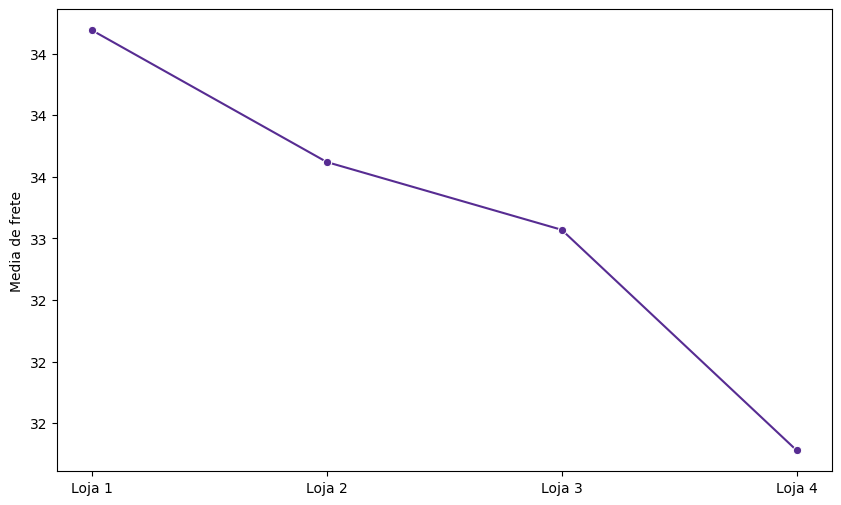

In [12]:
df_frete = pd.DataFrame.from_dict(frete_medio, orient='index', columns=['media'])
df_frete = df_frete.reset_index().rename(columns={'index': 'Loja'})


plt.figure(figsize = (10,6))
ax = sns.lineplot(x= 'Loja',y='media', data=df_frete,marker='o',color=sns.color_palette("Purples")[5])
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.ylabel('Media de frete')
plt.xlabel('')
plt.show()


# 6. Desempenho de cada loja por estado/Heatmap

    aqui iremos realizar a plotagem de um mapa usando a biblioteca "Folium" e utilizar a tabela de "Estado" que já temos no nosso arquivo para conseguirmos saber quais estados cada loja atende e quanto cada estado comprou.

In [13]:
vendas_por_estado = {nome_loja:lojas['Local da compra'].value_counts() for nome_loja, lojas in lojas.items()}

    Com os estados em mãos e quanto cada um comprou iremos elaborar um HeatMap(mapa de calor) para saber onde está o foco de venda de cada filial etc.

In [14]:
df = pd.DataFrame.from_dict(vendas_por_estado, orient='index').fillna(0)

coordenadas_estados = {
    'SP': [-23.5505, -46.6333],
    'RJ': [-22.9068, -43.1729],
    'MG': [-19.8157, -43.9542],
    'BA': [-12.9714, -38.5014],
    'RS': [-30.0346, -51.2177],
    'PE': [-8.0476, -34.8770],
    'PR': [-25.4284, -49.2733],
    'CE': [-3.7172, -38.5437],
    'MA': [-2.5391, -44.2824],
    'GO': [-16.6869, -49.2648],
    'SC': [-27.5954, -48.5480],
    'ES': [-20.3155, -40.3128],
    'AL': [-9.6657, -35.7350],
    'PA': [-1.4550, -48.4902],
    'DF': [-15.7801, -47.9292],
    'PI': [-5.0919, -42.8043],
    'PB': [-7.115, -34.861],
    'MT': [-15.6018, -56.0975],
    'MS': [-20.4697, -54.6201],
    'SE': [-10.9472, -37.0731],
    'RN': [-5.7945, -35.2110],
    'RO': [-10.1905, -64.8007],
    'AC': [-8.7749, -70.5357],
    'AP': [0.9026, -52.0315],
    'TO': [-12.2500, -46.3500],
    'RR': [2.8000, -60.6700]
}


mapa = folium.Map(location=[-15, -55], zoom_start=4)

for loja, estados_vendas in df.iterrows():
    feature_group = folium.FeatureGroup(name=loja)
    
    heat_data = []
    for estado, vendas in estados_vendas.items():
        if estado in coordenadas_estados:
            lat, lon = coordenadas_estados[estado]
            heat_data.append([lat, lon, vendas])
    
    HeatMap(heat_data).add_to(feature_group)
    feature_group.add_to(mapa)


folium.LayerControl().add_to(mapa)
mapa = mapa.get_root()
mapa.width = '600px'  
mapa.height = '400px'  

mapa


    Com isso criamos um mapa que possui cada camada uma loja diferente, mas que por sua vez mostra que o desempenho geografico das 4 lojas não difere muito um do outro o que pode ser tão levado em conta na decisão de venda do seu joão visto que todas as lojas possuem vendas em todos os estados.
    

# 7. Conclusão final 


    Sugerimos a venda da Loja 4 ao seu João, em vista que é a filial com menor faturamento, embora tenha a melhor avaliação das 4 e menor frete, isso pode ser dar por conta do baixo volume de vendas, registrado na filial, em vista disso sugere-se a venda da filial 4 e realocação dos valores para outros negocios e fortificação das 3 lojas, com foco na melhora da nota da loja 1, já que possui maior faturamento e consequentemente espera-se que se mantenha dessa forma. 